[Kaggle](www.kaggle.com) is a hub for data science. You can find data sets, code examples, and competitions there. If you don't have one already, make a kaggle account for yourself. 

Read the Overview and Data pages for the WiDS 2022 competition on estimating building energy use: https://www.kaggle.com/competitions/widsdatathon2022/data 

Then download the training data (train.csv)

From that file, plot histograms of values for the following columns:

floor area

elevation

cooling degree days

heating degree days

site_eui

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

array([[<AxesSubplot:title={'center':'floor_area'}>,
        <AxesSubplot:title={'center':'ELEVATION'}>],
       [<AxesSubplot:title={'center':'cooling_degree_days'}>,
        <AxesSubplot:title={'center':'heating_degree_days'}>],
       [<AxesSubplot:title={'center':'site_eui'}>, <AxesSubplot:>]],
      dtype=object)

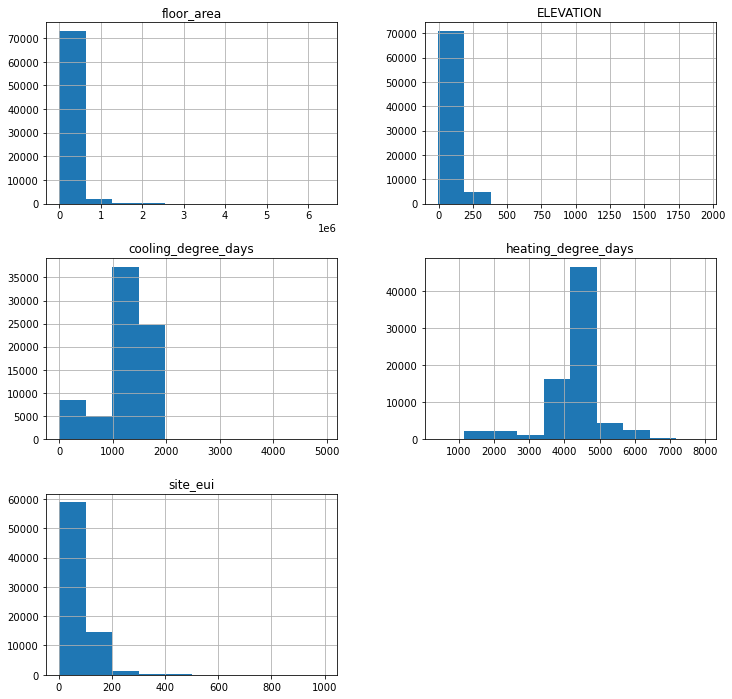

In [62]:
train_df = pd.read_csv('train.csv')
train_df.hist(column=["floor_area", "ELEVATION", "cooling_degree_days", "heating_degree_days", "site_eui"], figsize=(12,12))

Use the values from the first four columns listed above to train a linear regression model that predicts annual building energy use (site_eui). Report the root mean squared error of your model on the training data (for more on this measure see the Evaluation page on the WiDS Kaggle). 

In [64]:
X = train_df[['floor_area', 'ELEVATION', 'cooling_degree_days', 'heating_degree_days', 'id']]
Y = train_df['site_eui']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions\
print(np.sqrt(mean_squared_error(Y, Y_pred)))

57.2243231903334


As good data scientists, however, we know that in order to really test the performance of our model, we can't test it on the same data it trained on. To assess the performance of the model on a held-out test set, we will need to upload the model predictions to the Kaggle competition site.

To do this:

Download the test.csv dataset. This dataset does not include the site_eui column. 

Run your model on this data and print out the predicted site_eui for the first 5 buildings here. Save all the model predictions for site_eui as a .csv file in the form described on the Kaggle site. 



In [66]:
test_df = pd.read_csv('test.csv')
pred = linear_regressor.predict(test_df[['floor_area', 'ELEVATION', 'cooling_degree_days', 'heating_degree_days', 'id']])[0:5]
print(pred)
pred_full = linear_regressor.predict(test_df[['floor_area', 'ELEVATION', 'cooling_degree_days', 'heating_degree_days', 'id']])
pd.DataFrame({'id': test_df['id'], 'site_eui': pred_full.flatten()}).to_csv("output.csv", index=False)

[45.25393665 43.91136421 43.45092636 45.1193242  45.66466399]


Use the "Late Submission" button on the Kaggle site to upload your test predictions. 

Take a screenshot of the results (including both private and public score) and put it here.

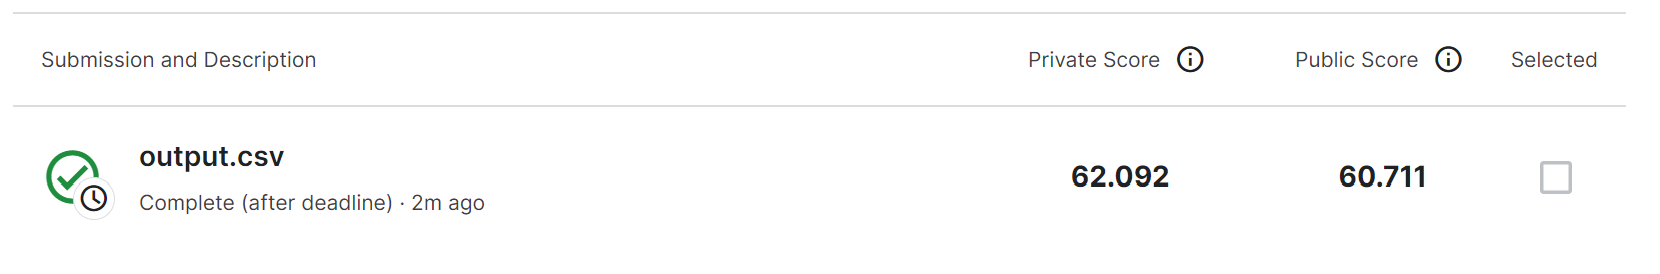

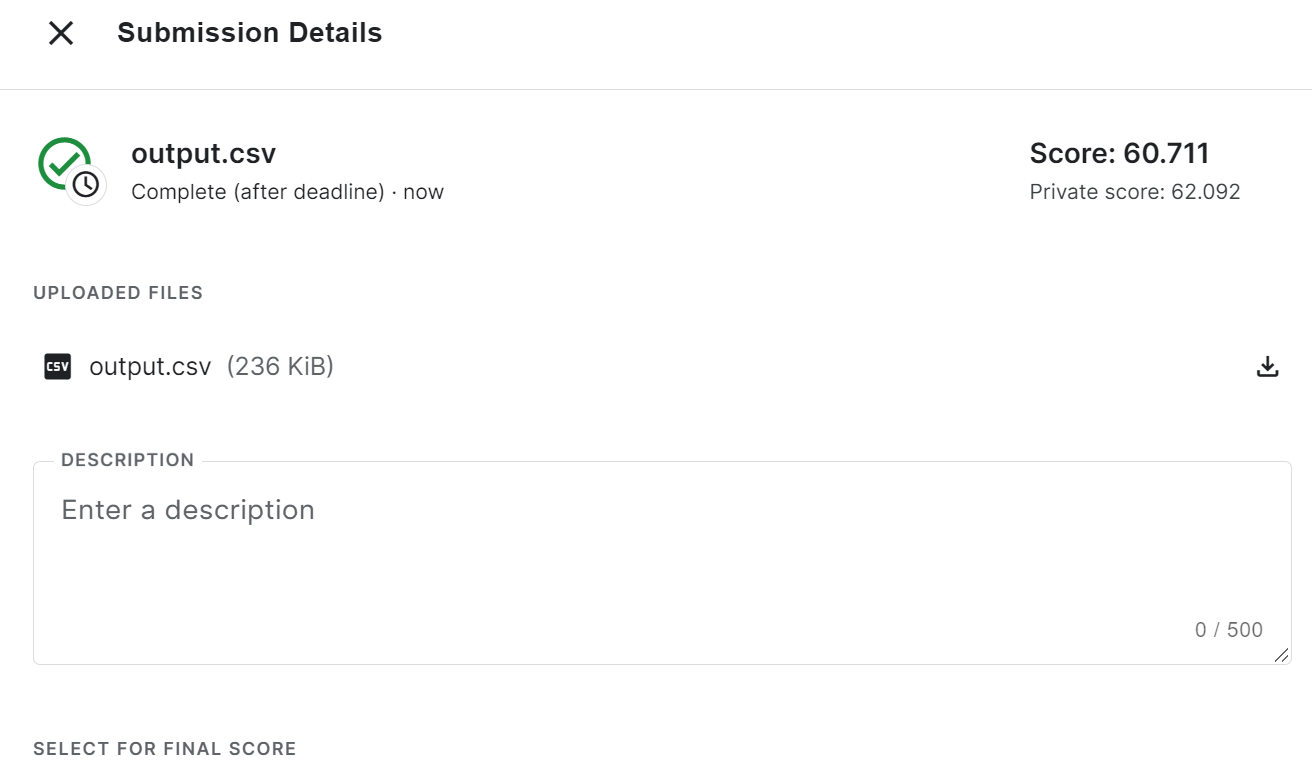